<a href="https://colab.research.google.com/github/MikeIV2007/DS_HW_03/blob/main/DS_HW_03_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#Домашнє завдання 03**

1. Напишіть функцію гіпотези лінійної регресії у векторному вигляді;


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model

In [55]:
def hyp_01(W, X):
    H = np.dot(X, W)
    return H

2. Cтворіть функцію для обчислення функції втрат у векторному вигляді;

In [56]:
def loss_function_01(X, Y, W):

    m = len(Y)
    H = hyp_01(W, X)
    J = (1 / (2 * m)) * np.dot((H - Y).T, (H - Y))
    return J

3. Реалізуйте один крок градієнтного спуску;

In [57]:
def gradient_descent_step_01(X, Y, W, learning_rate):
    m = len(Y)
    H = hyp_01(W, X)

    gradient = np.dot(X.T, (H - Y)) / m
    #gradient = (1 / m) * X.T @ (h - y)

    W = W - learning_rate * gradient
    return W

4. знайдіть найкращі параметри $\vec{w}$ для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;

In [58]:
df = pd.read_csv('/content/drive/MyDrive/Colab_data/Housing.csv')
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [60]:
df["ones"] = 1
X = df[["ones", "area", "bathrooms", "bedrooms" ]].values

Y = df["price"].values
#Y = df[["price"]]
w_0 = 1
w_1 = 1
w_2 = 1
w_3 = 1
W = np.array([w_0, w_1, w_2, w_3])

learning_rate = 0.0000000001
number_of_iterations = 10000
epsilon = 1000

In [61]:
def find_optimal_weights_01(X,Y,W, learning_rate, number_of_iterations, epsilon):
    cost_history = []
    for i in range(number_of_iterations):
        new_W = gradient_descent_step_01(X, Y, W, learning_rate)
        cost = loss_function_01(X, Y, W)
        W = new_W
        if len(cost_history)>0 and abs(cost - cost_history[-1]) < epsilon:
            print (f"loss function :{cost}")
            print (f"\nWeights:\n{W}")
            break
        cost_history.append(cost)
    return cost_history, W

In [62]:
cost_history, W = find_optimal_weights_01(X,Y,W, learning_rate, number_of_iterations, epsilon)

loss function :1673378175566.454

Weights:
[  1.24660293 855.62182396   1.41263248   1.82525113]


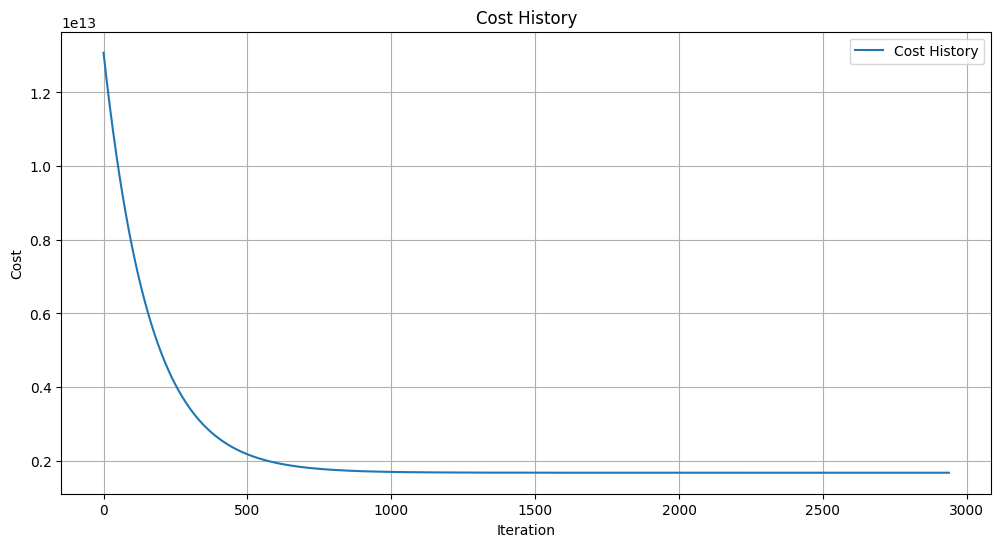

In [63]:
plt.figure(figsize=(12, 6))

plt.plot(cost_history, label='Cost History')
plt.title('Cost History')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()

plt.grid()
plt.show()

5. Знайдіть ці ж параметри за допомогою аналітичного рішення;

In [77]:
df["ones"] = 1
X = df[["ones", "area", "bathrooms", "bedrooms" ]].values

Y = df["price"].values
#Y = df[["price"]]
w_0 = 1
w_1 = 1
w_2 = 1
w_3 = 1
W = np.array([w_0, w_1, w_2, w_3])

learning_rate = 0.00000000001
number_of_iterations = 100000
epsilon = 100

In [67]:
cost_history, W = find_optimal_weights_01(X,Y,W, learning_rate, number_of_iterations, epsilon)

loss function :1673378175337.8276

Weights:
[  1.2466891  855.62135098   1.41281651   1.82557797]


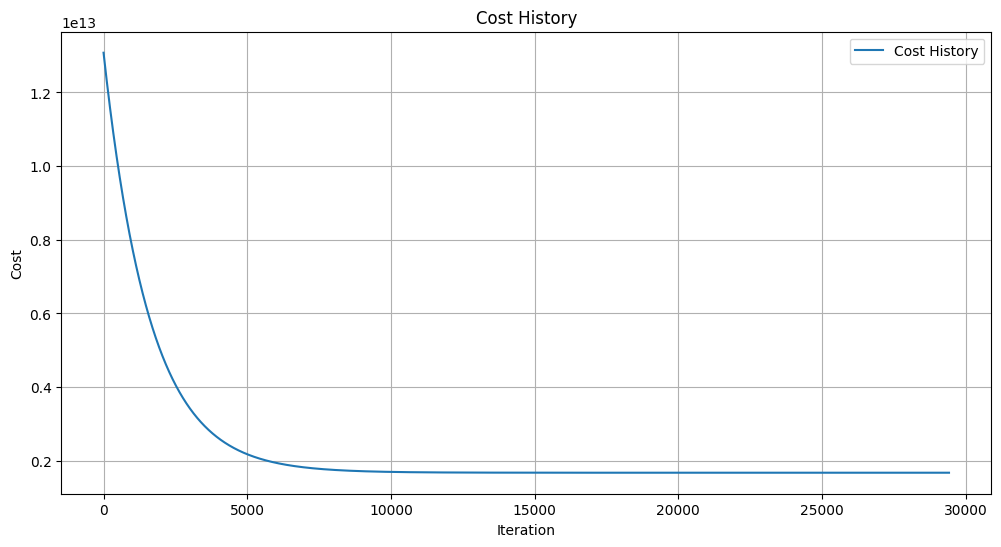

In [68]:
plt.figure(figsize=(12, 6))

plt.plot(cost_history, label='Cost History')
plt.title('Cost History')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()

plt.grid()
plt.show()

**After the first calculation:**

loss_function = 1673378175566.454

epsilon = 1000

**After the second calculation:**

loss_function = 1673380663699.3252

epsilon = 100

**Sklearn**

In [69]:
# df["ones"] = 1
# X = df[["ones", "area", "bathrooms", "bedrooms" ]].values
X = df[["area", "bathrooms", "bedrooms" ]].values

Y = df["price"].values

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X and Y are already defined
# X = df[["ones", "area", "bathrooms", "bedrooms"]].values
# Y = df[["price"]].values

# Step 2: Split the data into training and testing sets (optional but recommended)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 3: Create a linear regression model
model = LinearRegression()

# Step 4: Fit the model to the training data
model.fit(X_train, Y_train)

# Step 5: Make predictions on the test data
Y_pred = model.predict(X_test)

# Step 6: Evaluate the model performance
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Optionally, you can print the coefficients and intercept of the linear regression model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 2750040479309.0513
Root Mean Squared Error: 1658324.6001036863
Coefficients: [3.45466570e+02 1.42231966e+06 3.60197650e+05]
Intercept: 59485.37920871563


2D scotter plot

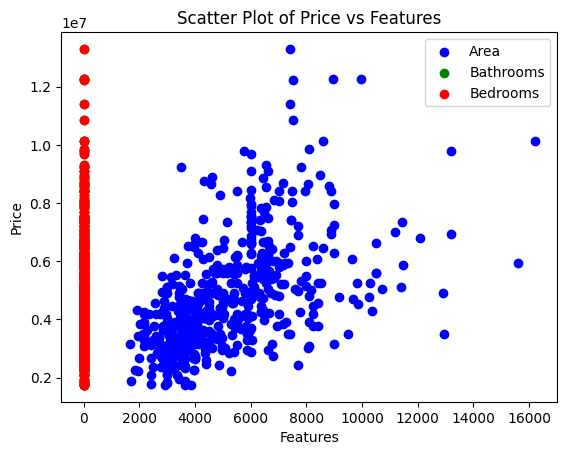

In [71]:
import matplotlib.pyplot as plt

# Assuming X and Y are already defined
# X = df[["area", "bathrooms", "bedrooms"]].values
# Y = df[["price"]].values

plt.scatter(X[:, 0], Y, color='blue', label='Area')
plt.scatter(X[:, 1], Y, color='green', label='Bathrooms')
plt.scatter(X[:, 2], Y, color='red', label='Bedrooms')

plt.xlabel('Features')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Features')
plt.legend()
plt.show()


3D scotter plot

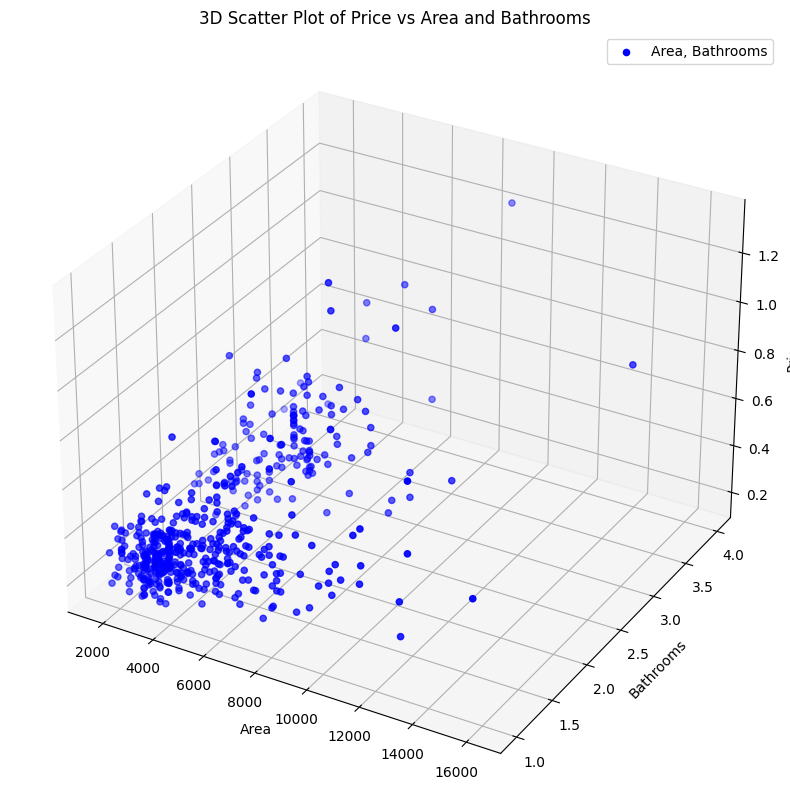

In [72]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Assuming X and Y are already defined
# X = df[["area", "bathrooms", "bedrooms"]].values
# Y = df[["price"]].values

ax.scatter(X[:, 0], X[:, 1], Y, c='blue', marker='o', label='Area, Bathrooms')
ax.set_xlabel('Area')
ax.set_ylabel('Bathrooms')
ax.set_zlabel('Price')
ax.set_title('3D Scatter Plot of Price vs Area and Bathrooms')
ax.legend()

plt.show()


In [ ]:
X.shape[1]

3

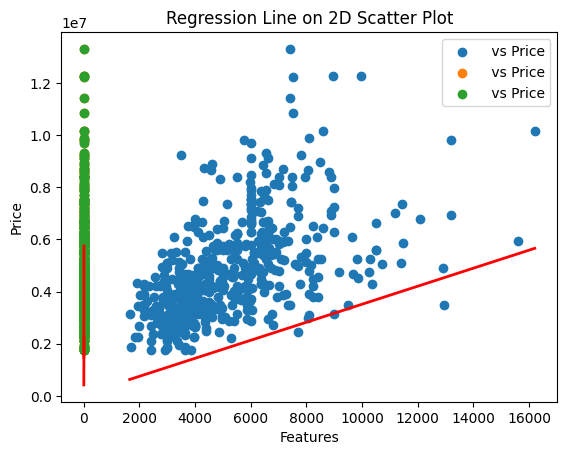

In [94]:
import matplotlib.pyplot as plt

X = df[["area", "bathrooms", "bedrooms"]].values
Y = df["price"].values

# Coefficients and intercept from sklearn result
coefficients = [3.45466570e+02, 1.42231966e+06, 3.60197650e+05]
intercept = 59485.37920872

# Scatter plot for each feature
for i in range(X.shape[1]):
    #plt.scatter(X[:, i], Y, label=f'{X.columns[i]} vs Price')
    plt.scatter(X[:, i], Y, label=' vs Price')

    # Regression line
    x_range = np.linspace(X[:, i].min(), X[:, i].max(), 100)
    y_range = coefficients[i] * x_range + intercept
    plt.plot(x_range, y_range, color='red', linewidth=2)

plt.xlabel('Features')
plt.ylabel('Price')
plt.title('Regression Line on 2D Scatter Plot')
plt.legend()
plt.show()


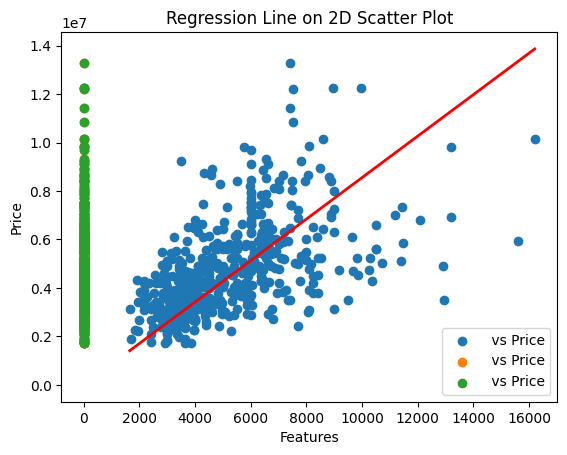

In [91]:
# Coefficients and intercept from calculation
coefficients = [8.55622238e+02, 4.13066612e-01, 8.26130493e-01]
intercept = 2.46868757e-01

# Scatter plot for each feature
for i in range(X.shape[1]):
    #plt.scatter(X[:, i], Y, label=f'{X.columns[i]} vs Price')
    plt.scatter(X[:, i], Y, label=' vs Price')

    # Regression line
    x_range = np.linspace(X[:, i].min(), X[:, i].max(), 100)
    y_range = coefficients[i] * x_range + intercept
    plt.plot(x_range, y_range, color='red', linewidth=2)

plt.xlabel('Features')
plt.ylabel('Price')
plt.title('Regression Line on 2D Scatter Plot')
plt.legend()
plt.show()

Дима Знайдіть ці ж параметри за допомогою аналітичного рішення;

In [95]:
df["ones"] = 1
X = df[["ones", "area", "bathrooms", "bedrooms" ]].values

Y = df["price"].values
#Y = df[["price"]]
w_0 = 1
w_1 = 1
w_2 = 1
w_3 = 1
W = np.array([w_0, w_1, w_2, w_3])

learning_rate = 0.00000000001
number_of_iterations = 100000
epsilon = 100

In [96]:
def analytical_solution(X, Y_train):
    return np.linalg.inv(X.T @ X) @ X.T @ Y

In [97]:
analytical_solution = analytical_solution(X, Y)
analytical_solution

array([-1.73171608e+05,  3.78762754e+02,  1.38604950e+06,  4.06820034e+05])

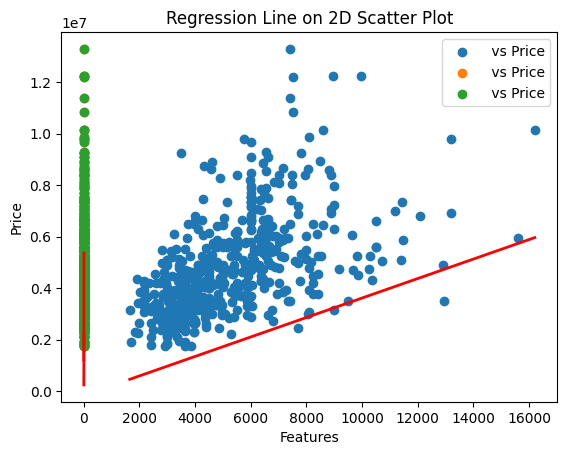

In [98]:
X = df[["area", "bathrooms", "bedrooms" ]].values

Y = df["price"].values

# Coefficients and intercept from sklearn result
coefficients = [3.78762754e+02,  1.38604950e+06,  4.06820034e+05]
intercept = -1.73171608e+05

# Scatter plot for each feature
for i in range(X.shape[1]):
    #plt.scatter(X[:, i], Y, label=f'{X.columns[i]} vs Price')
    plt.scatter(X[:, i], Y, label=' vs Price')

    # Regression line
    x_range = np.linspace(X[:, i].min(), X[:, i].max(), 100)
    y_range = coefficients[i] * x_range + intercept
    plt.plot(x_range, y_range, color='red', linewidth=2)

plt.xlabel('Features')
plt.ylabel('Price')
plt.title('Regression Line on 2D Scatter Plot')
plt.legend()
plt.show()